# Data Science QUESTION 2

  
You'll be asked to do some analysis and modeling tasks on a dataset created.  
The dataset concerns a video gaming company that has information on its customers and would like to gain more insights on what drives their customers to play for longer hours.  

The following tables are provided:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_districts_house_prices = pd.read_csv("df_districts_house_prices.csv")
df_person_data = pd.read_csv("df_person_data.csv")
df_person_district = pd.read_csv("df_person_district.csv")

df_person_district

includes information about each customer (person) and the district they live in

- person_id: the person id
- district: the name of the district

In [3]:
df_person_district

,person_id,district
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone
1,16f3bafb-9556-434e-adab-cb02f41fe32a,Tashnerspool
2,0fa17eee-7214-4609-97fe-dd3093601800,Tashnerspool
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,Ulven
4,51fed64a-375e-417f-94e4-4d27c368ea44,Red Onvey
...,...,...
69995,8cbea1e2-3257-4db5-ae59-84faa48cfde2,Bluffssel
69996,e099ace5-a760-4362-a9ea-ae8cee590b86,Highnantmar
69997,e9b0604e-ec84-4704-8e75-eabfd59ac4fb,Tashnerspool
69998,e20f8ec5-0ddf-4674-ac1f-d6280b6640ab,Highnantmar


df_districts_house_prices

includes information about each district and the prices of the houses in the district

- district: the name of the district
- house_price: the price of the house
- house_number: the house number in the district

In [4]:
df_districts_house_prices

,district,house_price,house_number
0,Celowsgan,160652.0,1
1,Celowsgan,159219.0,2
2,Celowsgan,161543.0,3
3,Celowsgan,158944.0,4
4,Celowsgan,164121.0,5
...,...,...,...
1358,El Willong,932441.0,30
1359,El Willong,890190.0,31
1360,El Willong,892096.0,32
1361,El Willong,935117.0,33


In [5]:
len(df_districts_house_prices['district'].unique())

50

df_person_data

includes personal information about each of the customers and relevant information to their video gaming habits

- person_id: identifier for a person
- age: the age of the person
- n_kids: the number of kids this person has
- n_vg: the number of video games the person owns
- n_con: the number of video game consols the person owns
- n_presub: the number of premium subscription the person owns
- n_hours_playing: the total number of hours this person play per month 

In [6]:
df_person_data

,person_id,age,n_kids,n_vg,n_con,n_presub,n_hours_playing
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745
1,16f3bafb-9556-434e-adab-cb02f41fe32a,18.0,0,2,0,0,20.693273
2,0fa17eee-7214-4609-97fe-dd3093601800,28.0,0,3,0,0,22.412490
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,20.0,1,72,0,0,299.187025
4,51fed64a-375e-417f-94e4-4d27c368ea44,32.0,1,58,1,3,20.367141
...,...,...,...,...,...,...,...
69995,8cbea1e2-3257-4db5-ae59-84faa48cfde2,32.0,4,62,1,2,21.378288
69996,e099ace5-a760-4362-a9ea-ae8cee590b86,36.0,0,53,1,1,3.707476
69997,e9b0604e-ec84-4704-8e75-eabfd59ac4fb,19.0,0,1,1,0,23.809075
69998,e20f8ec5-0ddf-4674-ac1f-d6280b6640ab,31.0,2,49,3,2,15.708397


## Quick EDA

The goals of these questions is to evaluate your plotting, data mangling, and plot interpretation skills.   
Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   

### 1. Plot each district's house prices distribution with marking the mean by a vertical line

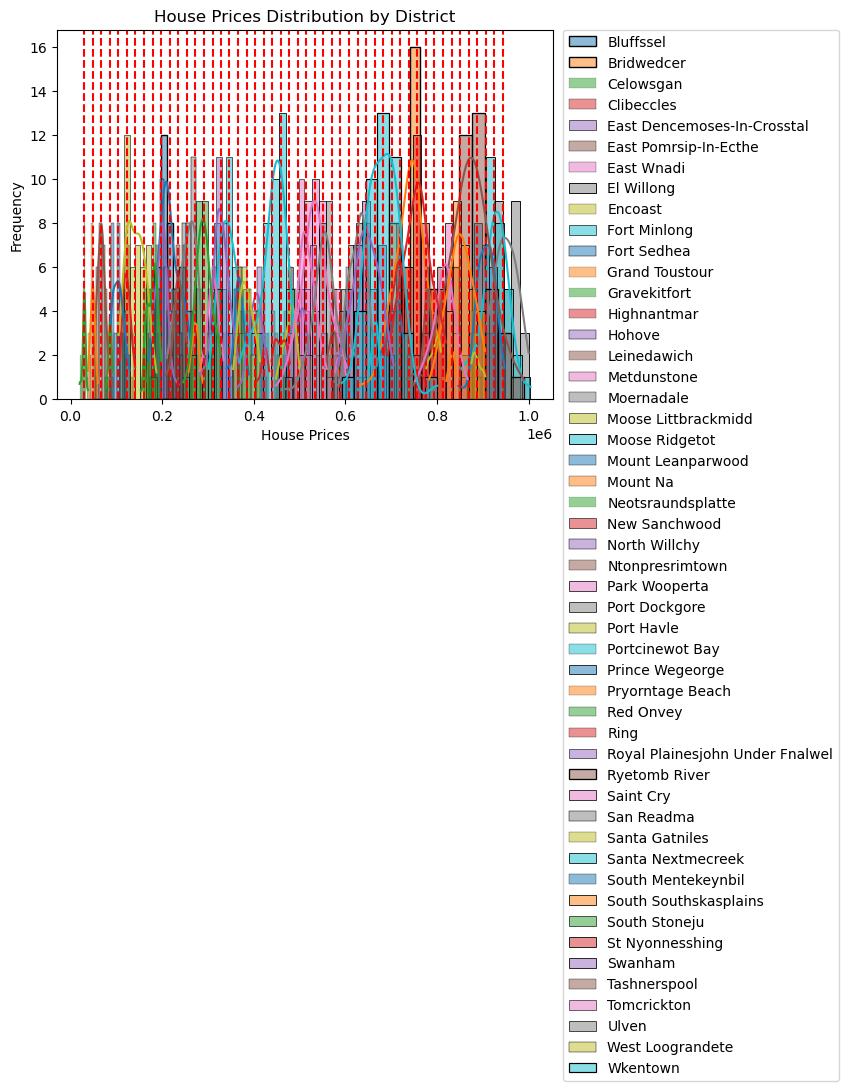

In [7]:

grouped_data = df_districts_house_prices.groupby('district')

for district, group in grouped_data:
    house_prices = group['house_price']

    # Plot the distribution of house prices
    g = sns.histplot(house_prices, kde=True, label=district)

    # Calculate the mean of house prices for the current district
    mean_price = house_prices.mean()

    # Plot a vertical line at the mean price
    plt.axvline(mean_price, color='r', linestyle='--')

plt.xlabel('House Prices')
plt.ylabel('Frequency')
plt.title('House Prices Distribution by District')
plt.legend(loc='center right')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()


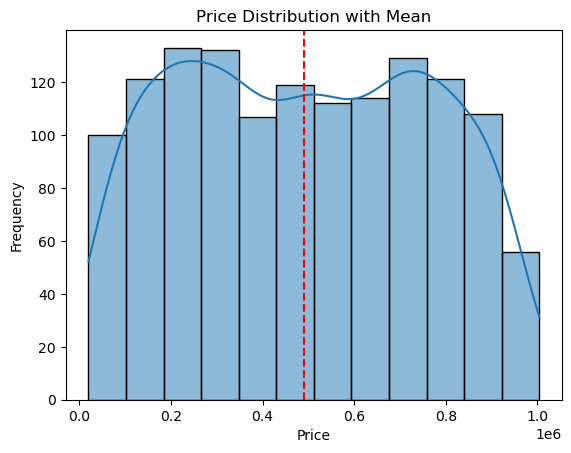

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Extract the price values from the dataset
prices = df_districts_house_prices['house_price']

# Calculate the mean price
mean_price = prices.mean()

# Plotting the price data
sns.histplot(prices, kde=True)

# Plotting a vertical line at the mean price
plt.axvline(mean_price, color='r', linestyle='--')

# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution with Mean')

# Showing the plot
plt.show()


### 2. Combine all of the three data sources into one table to use in further analysis. 

In [9]:
merged_common = pd.merge(df_person_district, df_person_data, on='person_id')
merged_data = pd.merge(merged_common, df_districts_house_prices, on='district')

In [10]:
merged_data.shape

(2014067, 10)

In [11]:
merged_data.head()

,person_id,district,age,n_kids,n_vg,n_con,n_presub,n_hours_playing,house_price,house_number
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone,14.0,0,0,0,0,18.422745,323177.0,1
1,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone,14.0,0,0,0,0,18.422745,NaN,2
2,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone,14.0,0,0,0,0,18.422745,333360.0,3
3,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone,14.0,0,0,0,0,18.422745,319360.0,4
4,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone,14.0,0,0,0,0,18.422745,333934.0,5


### 3. Plot age vs avg house price. What does this plot tell you? (younger people live in more expensive districts

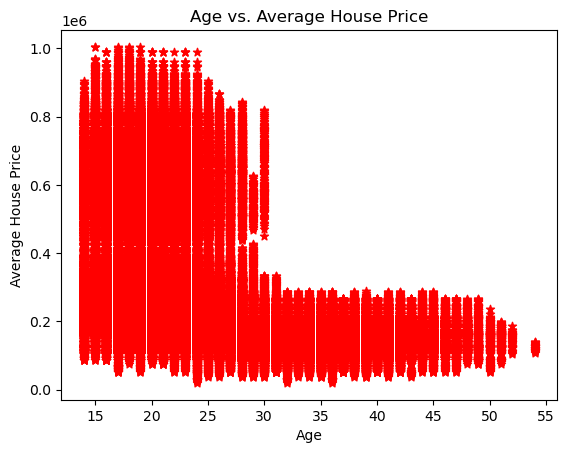

In [12]:
import matplotlib.pyplot as plt

plt.scatter(merged_data['age'], merged_data['house_price'],marker = '*', color = 'r')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Average House Price')
plt.title('Age vs. Average House Price')

# Display the plot
plt.show()


## Probability and Statistics:

The goal of these questions is to test your ability to answer probability and stat questions with code.   
Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   


### 1. What's the probability of a customer having 2 kids

In [13]:

count = df_person_data['n_kids'].value_counts().get(2, 0)
total = len(df_person_data)
probability = count / total
print("The probability of a customer having 2 kids is:", probability)


The probability of a customer having 2 kids is: 0.10017142857142858


### 2. What's the probability of a customer owning more than 10 video games given that they have less than 2 kids

In [14]:

filtered_data = df_person_data[df_person_data['n_kids'] < 2]
kids_2 = len(filtered_data)

game_10 = len(filtered_data[filtered_data['n_vg'] > 10])

probability = game_10 / kids_2

print("The probability of a customer owning more than 10 video games given less than 2 kids is:", probability)


The probability of a customer owning more than 10 video games given less than 2 kids is: 0.4018363273453094


### 3. Plot the distribution of the number of hours played by customers `n_hours_playing`. Briefly explain what you understand now about the customers' playing hours.

- The data explain that the most of the people are rather extremely addicted or are using it for time pass. The most of the people playing video games are under 100 hours which means there are not much addicted but there are some kids who are very addicted, they are playing in between 300 -400 hours. The data is showing the the two different type of people.

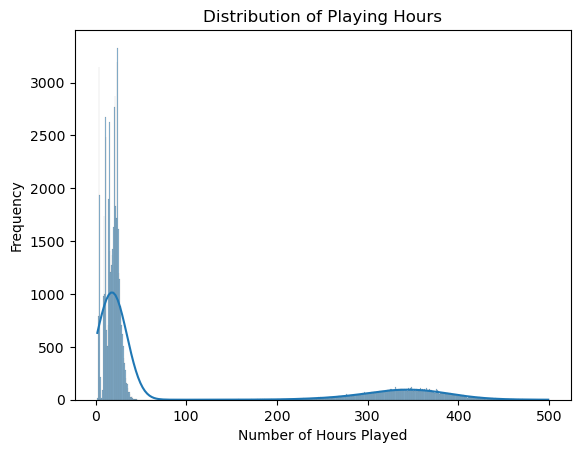

In [15]:
sns.histplot(data=df_person_data, x='n_hours_playing', kde=True)

plt.xlabel('Number of Hours Played')
plt.ylabel('Frequency')
plt.title('Distribution of Playing Hours')
plt.show()


As you can see, most customers have a number of hours less than 50 so let's go ahead and remove any values less than 50.  
The distribution of the remaining values look like a normal distribution.  
###  4. Estimate the parameters (mean and std deviation) of this normal distribution computationally.  \
### (Bonus: plot the estimated normal distribution on top of the distribution of `n_hours_playing` after removing values < 50)

In [16]:
import numpy as np
lower_50 = df_person_data[df_person_data['n_hours_playing']<50]
mean = np.mean(lower_50['n_hours_playing'])
std_dev = np.std(lower_50['n_hours_playing'])
print("Mean:", mean)
print("Standard Deviation:", std_dev)


Mean: 17.85123344538773
Standard Deviation: 7.832839972147522


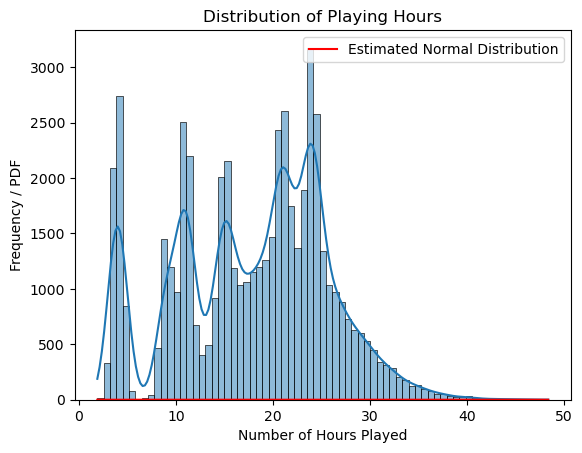

In [17]:
sns.histplot(data=lower_50, x='n_hours_playing', kde=True)

# Generate an array of values for the x-axis
x = np.linspace(min(lower_50['n_hours_playing']), max(lower_50['n_hours_playing']), 100)

# Compute the probability density function (PDF) for the estimated normal distribution
pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-(x - mean) ** 2 / (2 * std_dev ** 2))

# Plot the estimated normal distribution
plt.plot(x, pdf, color='red', label='Estimated Normal Distribution')

plt.xlabel('Number of Hours Played')
plt.ylabel('Frequency / PDF')
plt.title('Distribution of Playing Hours')
plt.legend()
plt.show()


# Modeling
The goal of this is to showcase your experimentation and model comparison process.  
The performance of models is not as important as how you compare them and evaluate them against each other.  

Use whatever libraries you are comfortable with.   
Code clarity and cleanliness are also highly valuable.   
# Apply Different regression model 
# Apply two classffier Model for the data of classfication ( as per your choice)

### 1. Model the number of hours played for each customer. Show your experimentation with failed and successful models.
### 2. Evaluate each experiment using appropriate metrics, cross validation, and plots. Show the predicted vs actual plot.
### 3. Choose the best model for the data

## Regression Model

In [18]:
df_person_data.head()

,person_id,age,n_kids,n_vg,n_con,n_presub,n_hours_playing
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,14.0,0,0,0,0,18.422745
1,16f3bafb-9556-434e-adab-cb02f41fe32a,18.0,0,2,0,0,20.693273
2,0fa17eee-7214-4609-97fe-dd3093601800,28.0,0,3,0,0,22.412490
3,8db4ca66-dfb2-43f2-9c22-aa861dd0d218,20.0,1,72,0,0,299.187025
4,51fed64a-375e-417f-94e4-4d27c368ea44,32.0,1,58,1,3,20.367141


In [19]:
df = df_person_data.copy()

In [20]:
df.isnull().sum()

person_id           0
age                10
n_kids              0
n_vg                0
n_con               0
n_presub            0
n_hours_playing     0
dtype: int64

In [21]:
df['age'] = df['age'].fillna(df['age'].mean())

In [22]:
df.isnull().sum()

person_id          0
age                0
n_kids             0
n_vg               0
n_con              0
n_presub           0
n_hours_playing    0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [24]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

# Encode the 'category' colum


In [25]:
for col in df.columns:
    if df[col].dtypes == 'O':
        df[col] = label_encoder.fit_transform(df[col])


In [26]:
df

,person_id,age,n_kids,n_vg,n_con,n_presub,n_hours_playing
0,22197,14.0,0,0,0,0,18.422745
1,6248,18.0,0,2,0,0,20.693273
2,4270,28.0,0,3,0,0,22.412490
3,38889,20.0,1,72,0,0,299.187025
4,22534,32.0,1,58,1,3,20.367141
...,...,...,...,...,...,...,...
69995,38621,32.0,4,62,1,2,21.378288
69996,61337,36.0,0,53,1,1,3.707476
69997,63911,19.0,0,1,1,0,23.809075
69998,61750,31.0,2,49,3,2,15.708397


## Feature selection

In [27]:
from sklearn.feature_selection import mutual_info_regression

In [28]:
'''PERFORMED MUTUAL INFO REGRESSION FOR FEARURE SELECTION'''

def make_mi_score(x,y):
    for colname in x.select_dtypes(['object','category']): # taking data type
        x[colname], _ = x[colname].factorize() 
        
        
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in x.dtypes]
    # All discrete features should now have integer dtypes
    mi_score = mutual_info_regression(x,y,discrete_features=discrete_features,random_state=0)
    mi_score = pd.Series(mi_score,name='Mutual Information Score',index=x.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score


x = df.copy()
x = x.drop('person_id', axis = 1)
y = x.pop('n_hours_playing')

mi_score = make_mi_score(x,y)
mi_score

age         0.943516
n_vg        0.874954
n_presub    0.333122
n_con       0.248262
n_kids      0.191144
Name: Mutual Information Score, dtype: float64

Index(['person_id', 'age', 'n_kids', 'n_vg', 'n_con', 'n_presub',
       'n_hours_playing'],
      dtype='object')

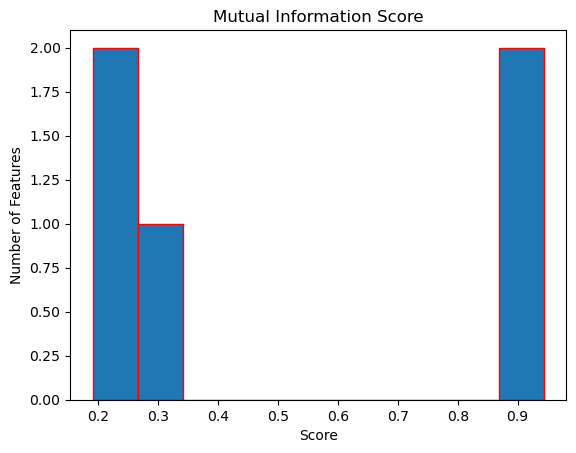

In [29]:
'''VISUALIZATION MI SCORE FOR EACH FEATURE'''
''' SLECTING FEATURE WHERE MI SCORE IS GREATER THAN 0.2'''

import matplotlib.pyplot as plt
mi_score1 = pd.DataFrame(mi_score)
plt.hist(mi_score1['Mutual Information Score'], edgecolor = 'red')
plt.title('Mutual Information Score')
plt.xlabel('Score')
plt.ylabel('Number of Features')
df1 = mi_score1[mi_score1.iloc[:, -1] >0.2]
df1 = df1.squeeze()
df.keys()

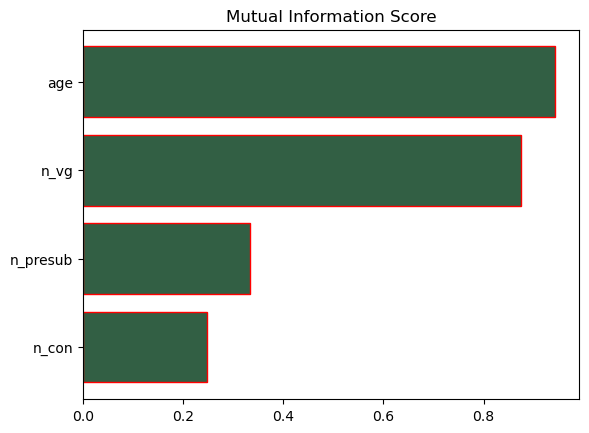

In [30]:
def plot_mi_score(score):
    score = score.sort_values(ascending = True)
    width = np.arange(len(score))
    ticks = list(score.index)
    plt.barh(width,score, color = '#325F44', edgecolor = 'red')
    plt.yticks(width,ticks)
    plt.title('Mutual Information Score')

plot_mi_score(df1)

In [31]:
X = df[['n_presub', 'age','n_vg']]

In [32]:
y= df['n_hours_playing']

## Scalling the dataset

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)



## Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, shuffle = True) 

## Model Training
## Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression


# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)


In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [37]:
print('The root mean suqare error is {} the absolute error is {}, the r2 is {}'.format(mse,mae,r2))

The root mean suqare error is 3405.3367560019096 the absolute error is 44.90263981637321, the r2 is 0.8072460251716969


## Decision Tree Regressor

In [43]:
from sklearn.tree import DecisionTreeRegressor

# Create an instance of the DecisionTreeRegressor model
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)


In [44]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [45]:
print('The root mean suqare error is {} the absolute error is {}, the r2 is {}'.format(mse,mae,r2))

The root mean suqare error is 618.1376819213673 the absolute error is 8.871765015810968, the r2 is 0.9652757512831959


## Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the RandomForestRegressor model
model = RandomForestRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)


In [47]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [48]:
print('The root mean suqare error is {} the absolute error is {}, the r2 is {}'.format(mse,mae,r2))

The root mean suqare error is 578.3900795797101 the absolute error is 8.92389444826174, the r2 is 0.9675085962786962


## Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

# Create an instance of the GradientBoostingRegressor model
model = GradientBoostingRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)


In [39]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [40]:
print('The root mean suqare error is {} the absolute error is {}, the r2 is {}'.format(mse,mae,r2))

The root mean suqare error is 764.5113855109201 the absolute error is 11.458643329343001, the r2 is 0.9567259807421407


## Classification

## Taking top 3 districts only

In [45]:
df = merged_data.copy()

In [46]:
df.head()

,person_id,district,age,n_kids,n_vg,n_con,n_presub,n_hours_playing,house_price,house_number
0,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone,14.0,0,0,0,0,18.422745,323177.0,1
1,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone,14.0,0,0,0,0,18.422745,NaN,2
2,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone,14.0,0,0,0,0,18.422745,333360.0,3
3,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone,14.0,0,0,0,0,18.422745,319360.0,4
4,50c4c7e2-89a6-440b-a8e3-c44aa2c6150e,Metdunstone,14.0,0,0,0,0,18.422745,333934.0,5


In [47]:
x = df['district'].value_counts()

In [48]:
l = x.index.tolist()
l = l[:3]
df1 = df[df['district'].isin(l)]

In [52]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

# Encode the 'category' colum
for col in df1.columns:
    if df1[col].dtypes == 'O':
        df1[col] = label_encoder.fit_transform(df1[col])


In [56]:
df1['house_price'] = df1['house_price'].fillna(df1['house_price'].mean())
df1['age'] = df1['age'].fillna(df1['house_price'].mean())

In [57]:
X1 = df1.drop('district', axis = 1)
y1= df1['district']

## Dimentionality Reduction and Feature Selection

In [58]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
svc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X1, y1)
model = SelectFromModel(svc, prefit=True)
X_new1 = model.transform(X1)
X_new1.shape

(673352, 7)

## Scalling 

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_new1)



In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y1, test_size=0.3, shuffle = True) 

## Model training

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
cls = SVC(C=50).fit(X_train, y_train)
#C is penalty to model

In [ ]:
# train and test accuracy
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, cls.predict(X_test)))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, cls.predict(X_test), labels=cls.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cls.classes_)
disp.plot()
plt.show()

## Decision Tree

In [ ]:
#we will use decision tree model for better accuracy 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print("Decision Tree Accuracy:{:.2f}%".format(model.score(X_test, y_test) * 100))

In [ ]:
print(classification_report(y_test, model.predict(X_test)))


In [ ]:
cm = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'liblinear', penalty = 'l1')
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

## Random Foreset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

## Parameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## SVM

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['sigmoid']}
# Grid Search CV
grid_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)


# fitting the model for grid search
grid_svm.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
print("Best Paramter After tunning:", grid_svm.best_params_)

# print how our model looks after hyper-parameter tuning
print("Model After Tunning:", grid_svm.best_estimator_)

In [ ]:
grid_predictions_svm = grid_svm.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions_svm))

In [ ]:
# parameter grid
parameters_svm = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

## Logistic regression

In [ ]:
logreg = LogisticRegression()
clf_svm = GridSearchCV(logreg,                    # model
                   param_grid = parameters_svm,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)        

In [ ]:
clf_svm.fit(X_train,y_train)

In [ ]:
print("Best Tuned Hyperparameters :", clf_svm.best_params_)
print("Accuracy at Tunned Hyperparameters :",clf_svm.best_score_)

# Random Forest

In [ ]:
rfc = RandomForestClassifier(random_state=42)


In [ ]:
param_grid_rfc = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, cv= 5)
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=4, criterion='gini')


In [ ]:
rfc1.fit(X_train, y_train)


In [ ]:
pred_rfc=rfc1.predict(X_test)


In [ ]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred_rfc))


## Decision Tree

In [ ]:
dt =DecisionTreeClassifier(random_state=42)

In [ ]:
param_grid_dt = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15), }

In [ ]:
CV_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv= 5)
CV_dt.fit(X_train, y_train)

In [ ]:
CV_dt.best_params_

In [ ]:
dt1 =DecisionTreeClassifier(random_state=42, max_depth=3, criterion='gini')


In [ ]:
dt1.fit(X_train, y_train)
pred_dt1 =dt1.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred_dt1))


## Due to low comutation power, this could not run.